<a href="https://colab.research.google.com/github/MehmedBucket03/SeniorProject/blob/ranveer/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 2: Image Filtering

## Part 1: What is an image?

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from skimage import io as io_url

In [2]:
arr1 = np.array([20,15,50,9])
arr2 = np.array([20,30,20,15])
#3 dimensions for color of pixel

#slice
print(arr[0:3])
print(arr[4:8])

#reverse slice
print(arr[-6:-2])

#resize array
newarr1 = arr.reshape(3,3)
print(newarr1)

#combining two images
newarr2 = np.add(arr1,arr2)
print(newarr2)


#plotting
x = np.array([1,2,3,4])
y = np.array([20,30,25,15])

plt.plot(x,y)
plt.show()


NameError: name 'arr' is not defined

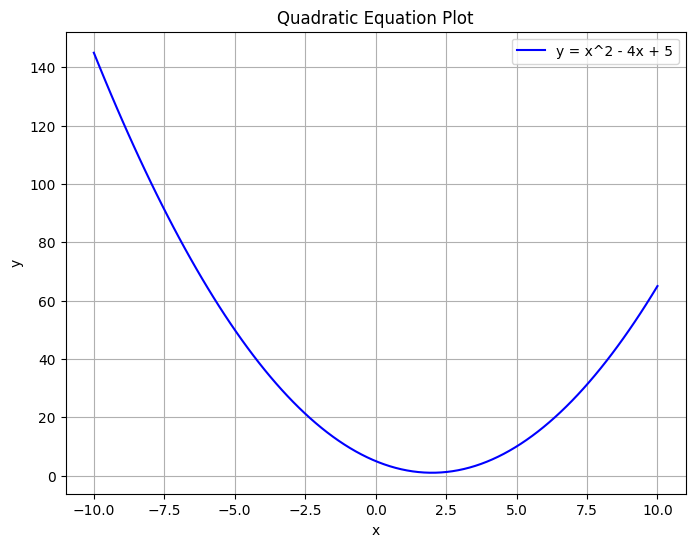

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Generate x values
x = np.linspace(-10, 10, 100)

# Quadratic equation: y = x^2 - 4x + 5
y = x**2 - 4*x + 5

# Plotting the graph
plt.figure(figsize=(8, 6))
plt.plot(x, y, label='y = x^2 - 4x + 5', color='blue')
plt.title('Quadratic Equation Plot')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.show()

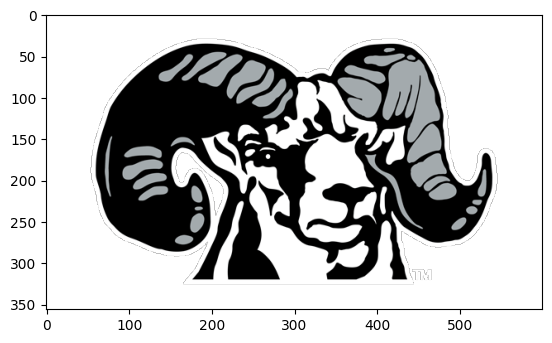

In [4]:
# Part 2: Plot an Image
import cv2
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from skimage import io as io_url

# Load the image file (update the path to your image)
frame = io_url.imread('https://www.farmingdale.edu/marketing-communications/images/branding-guidelines/fsc-ram-600x356.png')
frame = np.float32(frame) / 255

plt.imshow(frame)

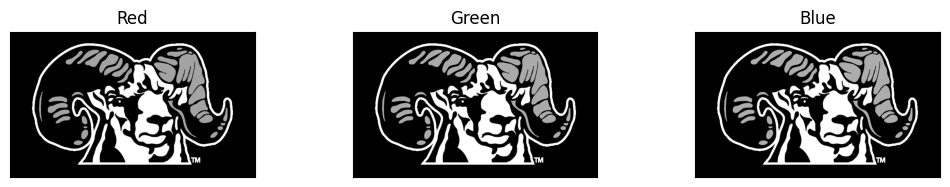

In [5]:
fig = plt.figure(figsize=(12, 12));
fig.subplots_adjust(hspace=0.4, wspace=0.4);

ax = fig.add_subplot(1, 3, 1);
ax.set_title('Red');
ax.imshow(frame[:,:,0], cmap="gray");
ax.set_xticks([]); ax.set_yticks([]);

ax = fig.add_subplot(1, 3, 2);
ax.set_title('Green');
ax.imshow(frame[:,:,1], cmap="gray");
ax.set_xticks([]); ax.set_yticks([]);

ax = fig.add_subplot(1, 3, 3);
ax.set_title('Blue');
ax.imshow(frame[:,:,2], cmap="gray");
ax.set_xticks([]); ax.set_yticks([]);

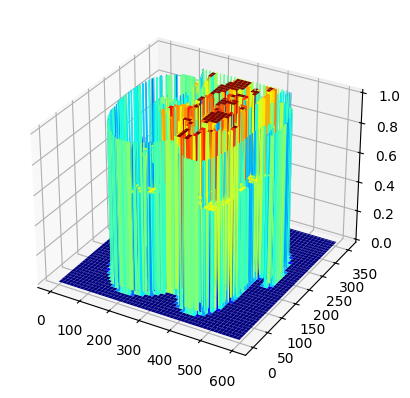

In [6]:
x = range(frame.shape[0]);
y = range(frame.shape[1]);

X, Y = np.meshgrid(y, x);

fig = plt.figure();
ax = plt.axes(projection='3d');
ax.plot_surface(X, Y, frame[:,:,0], cmap='jet');

## Part 2: Point processing

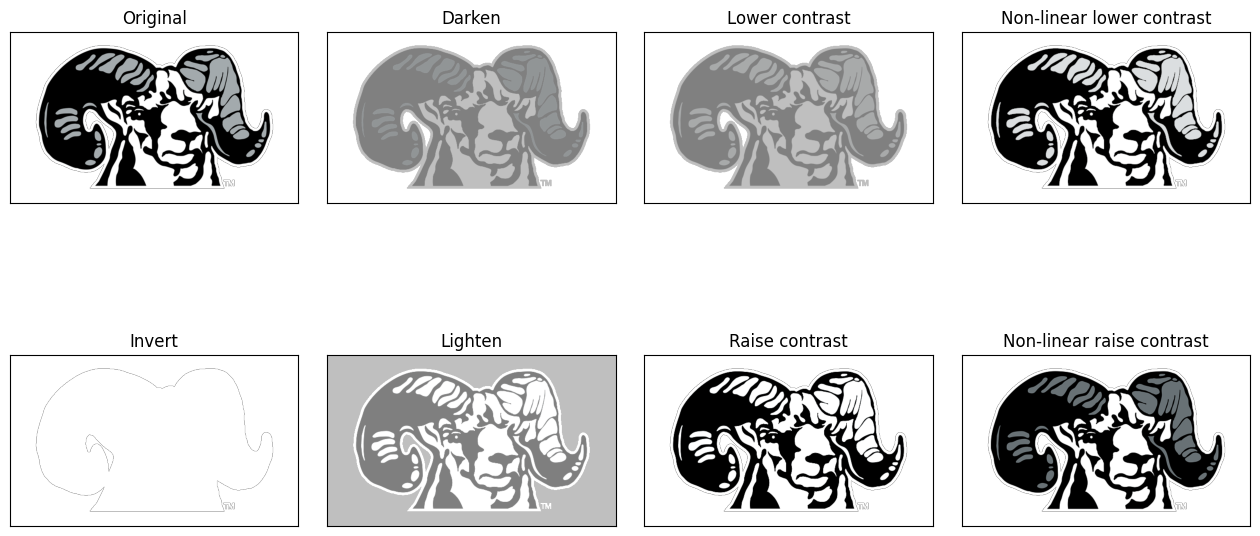

In [7]:
fig = plt.figure(figsize=(16, 8));
fig.subplots_adjust(hspace=0.1, wspace=0.1);

ax = fig.add_subplot(2, 4, 1);
ax.set_title('Original');
ax.imshow(frame);
ax.set_xticks([]); ax.set_yticks([]);

ax = fig.add_subplot(2, 4, 2);
ax.set_title('Darken');
ax.imshow(np.clip(frame - 0.5, 0, 1));
ax.set_xticks([]); ax.set_yticks([]);

ax = fig.add_subplot(2, 4, 3);
ax.set_title('Lower contrast');
ax.imshow(frame / 2);
ax.set_xticks([]); ax.set_yticks([]);

ax = fig.add_subplot(2, 4, 4);
ax.set_title('Non-linear lower contrast');
ax.imshow(frame**(1/3));
ax.set_xticks([]); ax.set_yticks([]);

ax = fig.add_subplot(2, 4, 5);
ax.set_title('Invert');
ax.imshow(1 - frame);
ax.set_xticks([]); ax.set_yticks([]);

ax = fig.add_subplot(2, 4, 6);
ax.set_title('Lighten');
ax.imshow(np.clip(frame + 0.5, 0, 1));
ax.set_xticks([]); ax.set_yticks([]);

ax = fig.add_subplot(2, 4, 7);
ax.set_title('Raise contrast');
ax.imshow(np.clip(frame * 2, 0, 1));
ax.set_xticks([]); ax.set_yticks([]);

ax = fig.add_subplot(2, 4, 8);
ax.set_title('Non-linear raise contrast');
ax.imshow(frame**2);
ax.set_xticks([]); ax.set_yticks([]);

## Part 3: Linear shift-invariant image filtering

In [ ]:
fig = plt.figure(figsize=(16, 8));

# Box filter
N = 10;
g = np.ones((N,N))/(N**2);

image = cv2.filter2D(frame,-1,g);
plt.imshow(image);

NameError: name 'plt' is not defined

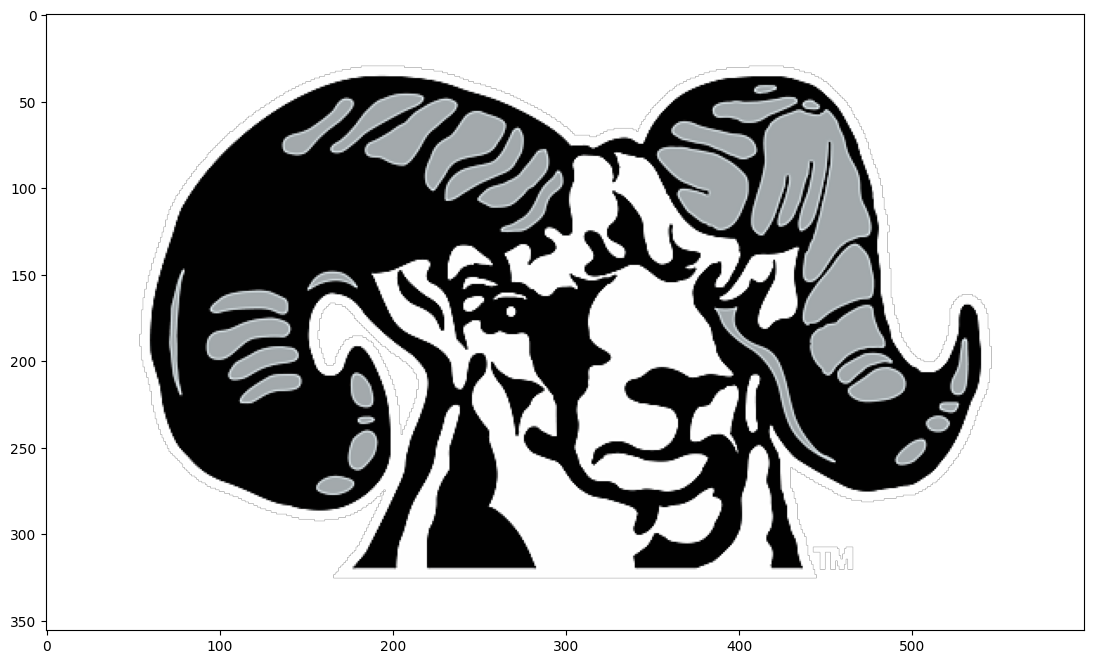

In [8]:
fig = plt.figure(figsize=(16, 8));

# Sharpening filter
N = 3;
g = -np.ones((N,N))/(N**2);
g[(N-1)//2,(N-1)//2] += 2;

image = cv2.filter2D(frame,-1,g);
plt.imshow(np.clip(image,0,1),cmap='gray');

## Part 4: Image gradients

In [ ]:
k = 7 # Kernel size

laplacian = cv2.Laplacian(frame,-1,ksize=k)
sobel_x = cv2.Sobel(frame,-1,1,0,ksize=k)
sobel_y = cv2.Sobel(frame,-1,0,1,ksize=k)

fig = plt.figure(figsize=(8, 8));
fig.subplots_adjust(hspace=0.1, wspace=0.1);

ax = fig.add_subplot(2, 2, 1);
ax.set_title('Original');
ax.imshow((frame), cmap='gray');
ax.set_xticks([]); ax.set_yticks([]);

ax = fig.add_subplot(2, 2, 2);
ax.set_title('Sobel X');
ax.imshow(np.abs(sobel_x)/np.abs(sobel_x).max(), cmap='gray');
ax.set_xticks([]); ax.set_yticks([]);

ax = fig.add_subplot(2, 2, 3);
ax.set_title('Sobel Y');
ax.imshow(np.abs(sobel_y)/np.abs(sobel_y).max(), cmap='gray');
ax.set_xticks([]); ax.set_yticks([]);

ax = fig.add_subplot(2, 2, 4);
ax.set_title('Laplacian');
ax.imshow(np.abs(laplacian)/np.abs(laplacian).max(), cmap='gray');
ax.set_xticks([]); ax.set_yticks([]);

NameError: name 'cv2' is not defined